In [7]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [8]:
#LOADING THE DATA AND CREATING A DATAFRAME
df = pd.read_csv(r'dielectron.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [9]:
#Using the momentum conservatium and later, squared both sides, we acn analyze the energy of each colision, using relativistics concepts.
TransversalMomentum1 = df['pt1'] #Transversal Momentum of the first particle
TransversalMomentum1.to_numpy
TransversalMomentum2 = df['pt2'] #Transversal Momentum of the second particle
TransversalMomentum2.to_numpy
Energy1 = df['E1'] #Energy of the first particle in GeV
Energy1.to_numpy
Energy2 = df['E2'] #Energy of the second particle in GeV
Energy2.to_numpy
LightSpeed = 299792458 #Light speed in meters per second
MomentumVector1 = df[['px1 ', 'py1', 'pz1']] #Vectorial Momentum of the first particle
MomentumVector1 = MomentumVector1.to_numpy()
MomentumVector2 = df[['px2', 'py2', 'pz2']] #Vectorial Momentum of the second particle
MomentumVector2 = MomentumVector2.to_numpy()

<h4>#################################<h4>
<h4>Physics Model (Relativistic Mechanic Collisions)<h4>
<h4>#################################<h4>

In [10]:
x = 0
DotProduct = []
while x < 100000:
    DotProduct.append(np.dot(MomentumVector1[x], MomentumVector2[x]))
    x+=1
df['CollisionEnergy'] = abs((np.power(TransversalMomentum1, 2) + np.power(TransversalMomentum1,2) + 2*((Energy1*Energy2/LightSpeed)) - (DotProduct))/1000)

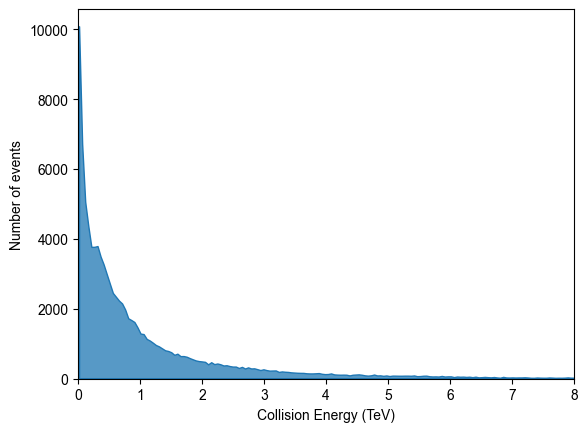

In [11]:
#Plotting a histogram to visualize the Collision Energy data
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.histplot(df.CollisionEnergy, ax=ax, stat='count', element='poly')
ax.set_xlabel('Collision Energy (TeV)')
ax.set_ylabel('Number of events')
ax.set_xlim(0.01,8)
ax.set_xticks(range(0,9))
plt.show()


In [12]:
print('The maximum energy released in this dataset is: ', round(max(df['CollisionEnergy']),2), 'TeV.')
print('The minimum energy released in this dataset is: ', round(min(df['CollisionEnergy']),2), 'TeV.')
print('The mean of the energy values in this dataset is: ', round(np.mean(df['CollisionEnergy']),2), 'TeV.')
print('The median of the energy values in this dataset is: ', round(np.median(df['CollisionEnergy']),2), 'TeV.')

The maximum energy released in this dataset is:  108.56 TeV.
The minimum energy released in this dataset is:  0.0 TeV.
The mean of the energy values in this dataset is:  1.25 TeV.
The median of the energy values in this dataset is:  0.55 TeV.


In [13]:
Conclusion = "I choose to exclude the minimum and the distant maximum values. This was chosen after analyze the whole histogram and noticing that the number of events with an higher energy than 8TeV is low. I choose to exclude the 0 energy events, by analyzing some small events (later, I'll add the limit element in this case). With the median and mean data, we can conclude that the most part of energy collisions is less than 2TeV."
print(Conclusion)

I choose to exclude the minimum and the distant maximum values. This was chosen after analyze the whole histogram and noticing that the number of events with an higher energy than 8TeV is low. I choose to exclude the 0 energy events, by analyzing some small events (later, I'll add the limit element in this case). With the median and mean data, we can conclude that the most part of energy collisions is less than 2TeV.


<h4>Mann, R. (2010). Chapter 2. In An introduction to particle physics and the standard model. essay, Taylor &amp; Francis.<h4>